<a href="https://colab.research.google.com/github/Prasanthsrinivas/MallCustomer_Segmentation_Data/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kmeans algorithm-Is a unsupervised learning algorithm here we are not going to predict anything,rather than that we are gng analyze patterns in the dataset/groups


In [ ]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading the dataset
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.shape

(200, 5)

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.shape

(200, 5)

In [ ]:
# assigning the required columns to the variable to find the patterns
x=df.iloc[: , [3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
# here scaling is mandatory bcoz where ever we use distance metric we need to scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

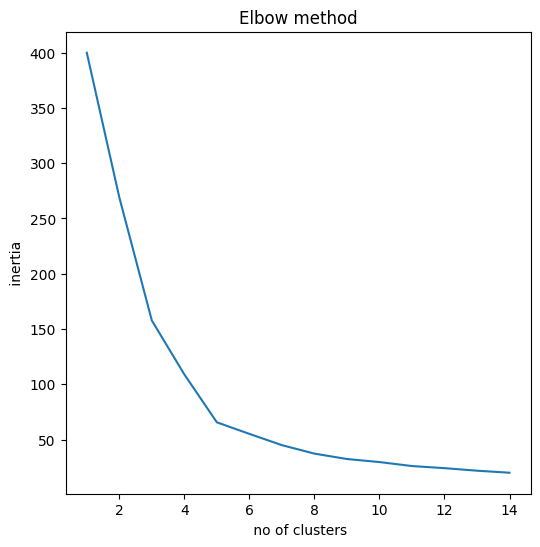

In [ ]:
# For Finding ELBOW METHOD toget the value of k and k is a hyperparameter

from sklearn.cluster import KMeans
inertia=[]

for i in range(1,15):
  km=KMeans(n_clusters=i)
  km.fit(X)
  inertia.append(km.inertia_)

plt.figure(figsize=(6,6))
plt.plot(range(1,15),inertia)
plt.xlabel(" no of clusters")
plt.ylabel(" inertia ")
plt.title("Elbow method")
plt.show()

K=5

In [ ]:
# model with where clusters=5
km=KMeans(n_clusters=5)
km.fit(X)
print(km.cluster_centers_)
print(km.labels_)
print(km.inertia_)

[[-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]
[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]
65.56840815571681


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


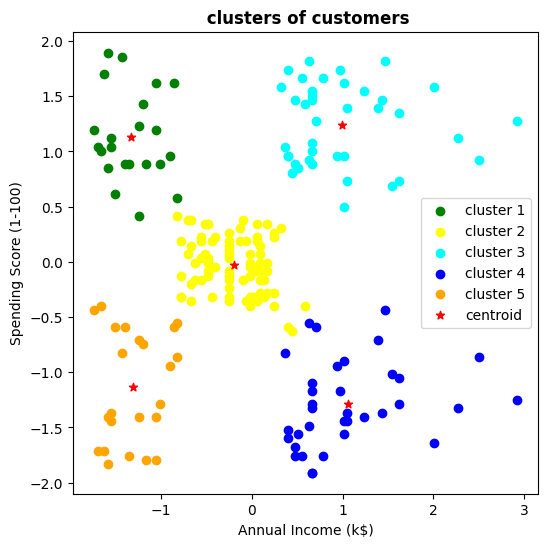

In [ ]:
# Plotting the model
fig,ax=plt.subplots(figsize=(6,6))

plt.scatter(X[km.labels_ == 0,0],X[km.labels_ == 0,1],c="green",label="cluster 1")
plt.scatter(X[km.labels_ == 1,0],X[km.labels_ == 1,1],c="yellow",label="cluster 2")
plt.scatter(X[km.labels_ == 2,0],X[km.labels_ == 2,1],c="cyan",label="cluster 3")
plt.scatter(X[km.labels_ == 3,0],X[km.labels_ == 3,1],c="blue",label="cluster 4")
plt.scatter(X[km.labels_ == 4,0],X[km.labels_ == 4,1],c="orange",label="cluster 5")
plt.scatter(km.cluster_centers_[ : ,0],km.cluster_centers_[ : ,1],marker="*",c="red",label="centroid")
plt.legend()

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title(" clusters of customers",fontweight="bold")

plt.show()

In [ ]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
km.predict(scaler.transform([[115,90]]))

array([2], dtype=int32)

#Model Interpretation
#Cluster 1 (green Color) -> earning less but spending more
#cluster 2 (yellow Colr) -> average in terms of earning and spending
#cluster 3 (cyan Color) -> earning high and also spending high [TARGET SET]
#cluster 4 (blue Color) -> earning high but spending less
#Cluster 5 (orange Color) -> Earning less , spending less
